# CAR PRICE PREDICTION

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading and Viewing our Data Set

In [2]:
Train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
Train['Distance'] =Train['Distance'].str.replace(',', '').astype(float)

In [4]:
Train.drop(['VehicleID'], axis = 1, inplace = True)


In [5]:
test.drop(['VehicleID'], axis = 1, inplace = True)

In [6]:
Train.describe(include="all")

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
count,7205,7205,7205,7184,7205,7188.000000,7008,4.845000e+03
unique,3,55,1223,33,21,NaN,3,NaN
top,Lagos,Toyota,Camry,"2,008",Black,NaN,Foreign Used,NaN
freq,3318,2742,651,755,2128,NaN,4896,NaN
mean,NaN,NaN,NaN,NaN,NaN,11.847999,NaN,1.031989e+05
std,NaN,NaN,NaN,NaN,NaN,25.318922,NaN,1.182902e+05
min,NaN,NaN,NaN,NaN,NaN,0.450000,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,5.235200e+04
50%,NaN,NaN,NaN,NaN,NaN,5.650000,NaN,8.083000e+04
75%,NaN,NaN,NaN,NaN,NaN,11.662500,NaN,1.175840e+05


In [7]:
test.describe(include="all")

,Location,Maker,Model,Year,Colour,Type,Distance
count,2061,2061,2061,2059,2061,2007,1385.000000
unique,3,40,587,29,18,3,NaN
top,Abuja,Toyota,Camry,"2,008",Black,Foreign Used,NaN
freq,962,816,183,194,610,1390,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,103800.668592
std,NaN,NaN,NaN,NaN,NaN,NaN,105986.234512
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,52352.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,82000.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,120398.000000


In [8]:
NewTrain = Train.drop(['Colour'], axis = 1, inplace = True)

In [9]:
Newtest= test.drop(['Colour'], axis = 1, inplace = True)

In [10]:
Train.head()

,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,"2,011",2.2,Nigerian Used,NaN
1,Ibadan,Hyundai,Sonata,"2,012",3.5,Nigerian Used,125000.0
2,Lagos,Lexus,RX 350,"2,010",9.2,Foreign Used,110852.0
3,Abuja,Mercedes-Benz,GLE-Class,"2,017",22.8,Foreign Used,30000.0
4,Ibadan,Toyota,Highlander,"2,002",2.6,Nigerian Used,125206.0


In [11]:
Train.isnull().sum()

Location                     0
Maker                        0
Model                        0
Year                        21
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [12]:
test.isnull().sum()

Location      0
Maker         0
Model         0
Year          2
Type         54
Distance    676
dtype: int64

In [13]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 7 columns):
Location                  7205 non-null object
Maker                     7205 non-null object
Model                     7205 non-null object
Year                      7184 non-null object
Amount (Million Naira)    7188 non-null float64
Type                      7008 non-null object
Distance                  4845 non-null float64
dtypes: float64(2), object(5)
memory usage: 394.1+ KB


In [14]:
Train.describe(include="all")

,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
count,7205,7205,7205,7184,7188.000000,7008,4.845000e+03
unique,3,55,1223,33,NaN,3,NaN
top,Lagos,Toyota,Camry,"2,008",NaN,Foreign Used,NaN
freq,3318,2742,651,755,NaN,4896,NaN
mean,NaN,NaN,NaN,NaN,11.847999,NaN,1.031989e+05
std,NaN,NaN,NaN,NaN,25.318922,NaN,1.182902e+05
min,NaN,NaN,NaN,NaN,0.450000,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,3.500000,NaN,5.235200e+04
50%,NaN,NaN,NaN,NaN,5.650000,NaN,8.083000e+04
75%,NaN,NaN,NaN,NaN,11.662500,NaN,1.175840e+05


In [15]:
Pricemean_value = Train['Amount (Million Naira)'].median()
Pricemean_value

5.65

In [16]:
Train['Amount (Million Naira)'].fillna(value=Pricemean_value, inplace=True)

In [17]:
Year_ModeValue = Train['Year'].mode()[0]
Year_ModeValue

'2,008'

In [18]:
Train['Year'].fillna(value=Year_ModeValue, inplace=True)

In [19]:
test['Year'].fillna(value=Year_ModeValue, inplace=True)

In [20]:
Train.isnull().sum()

Location                     0
Maker                        0
Model                        0
Year                         0
Amount (Million Naira)       0
Type                       197
Distance                  2360
dtype: int64

In [21]:
test.isnull().sum()

Location      0
Maker         0
Model         0
Year          0
Type         54
Distance    676
dtype: int64

In [22]:
Distancemean_value = Train['Distance'].median()
Distancemean_value

80830.0

In [23]:
Distancemeant_value = test['Distance'].median()
Distancemeant_value

82000.0

In [24]:
test['Distance'].fillna(value=Distancemeant_value, inplace=True)

In [25]:
Train['Distance'].fillna(value=Distancemean_value, inplace=True)

In [26]:
TypeMode_value = Train['Type'].mode()[0]
TypeMode_value

'Foreign Used'

In [27]:
Train['Type'].fillna(value=TypeMode_value, inplace=True)

In [28]:
test['Type'].fillna(value=TypeMode_value, inplace=True)

In [29]:
test.isnull().sum()

Location    0
Maker       0
Model       0
Year        0
Type        0
Distance    0
dtype: int64

In [30]:
Train.isnull().sum()

Location                  0
Maker                     0
Model                     0
Year                      0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [31]:
Train.isnull().sum()

Location                  0
Maker                     0
Model                     0
Year                      0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [32]:
# Train.drop_duplicates(inplace = True)

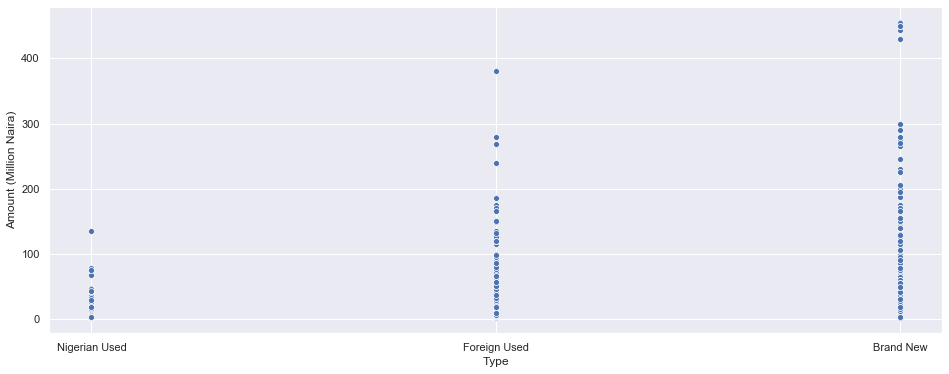

In [33]:
fig = plt.figure(figsize=(16,6))
sns.scatterplot(Train['Type'], Train['Amount (Million Naira)'])

In [34]:
Train.head()

,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,"2,011",2.2,Nigerian Used,80830.0
1,Ibadan,Hyundai,Sonata,"2,012",3.5,Nigerian Used,125000.0
2,Lagos,Lexus,RX 350,"2,010",9.2,Foreign Used,110852.0
3,Abuja,Mercedes-Benz,GLE-Class,"2,017",22.8,Foreign Used,30000.0
4,Ibadan,Toyota,Highlander,"2,002",2.6,Nigerian Used,125206.0


In [35]:

Train['Year'] =Train['Year'].str.replace(',', '').astype(int)

In [36]:
test['Year'] =test['Year'].str.replace(',', '').astype(int)

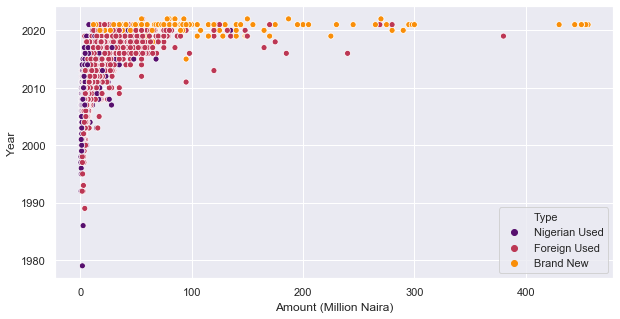

In [37]:
plt.figure(figsize = (10,5))
sns.scatterplot(Train['Amount (Million Naira)'], Train['Year'], hue = Train['Type'], palette = 'inferno')

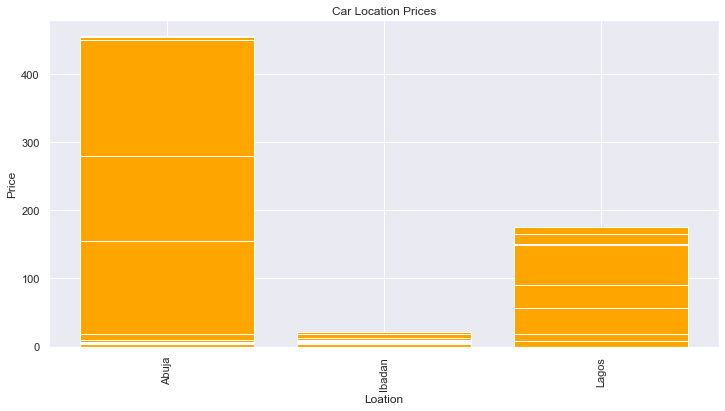

In [38]:
fig = plt.figure(figsize=(12,6))

plt.bar(x = Train['Location'], height = Train['Amount (Million Naira)'] , color='orange')

plt.title('Car Location Prices')
plt.xlabel('Loation')
plt.ylabel('Price')
#plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
        
plt.show()

In [39]:
Train.head()

,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,2011,2.2,Nigerian Used,80830.0
1,Ibadan,Hyundai,Sonata,2012,3.5,Nigerian Used,125000.0
2,Lagos,Lexus,RX 350,2010,9.2,Foreign Used,110852.0
3,Abuja,Mercedes-Benz,GLE-Class,2017,22.8,Foreign Used,30000.0
4,Ibadan,Toyota,Highlander,2002,2.6,Nigerian Used,125206.0


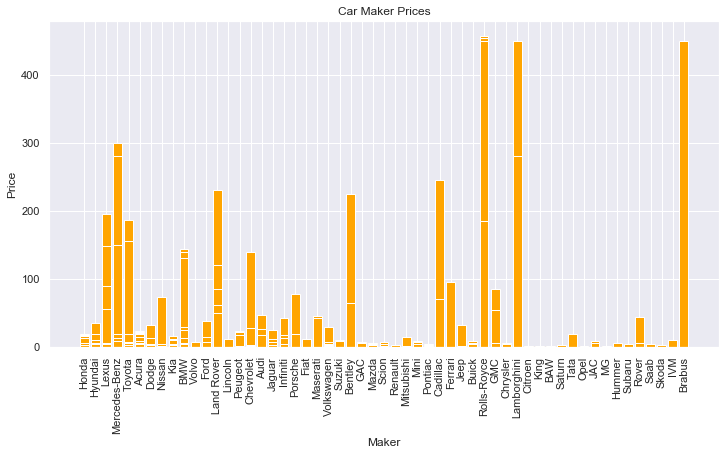

In [40]:
fig = plt.figure(figsize=(12,6))

plt.bar(x = Train['Maker'], height = Train['Amount (Million Naira)'] , color='orange')

plt.title('Car Maker Prices')
plt.xlabel('Maker')
plt.ylabel('Price')
#plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
        
plt.show()

In [41]:
NewTrain = Train.drop(['Model'], axis = 1, inplace = True)

In [42]:
NewTrainn = test.drop(['Model'], axis = 1, inplace = True)

In [43]:
Train.head()

,Location,Maker,Year,Amount (Million Naira),Type,Distance
0,Abuja,Honda,2011,2.2,Nigerian Used,80830.0
1,Ibadan,Hyundai,2012,3.5,Nigerian Used,125000.0
2,Lagos,Lexus,2010,9.2,Foreign Used,110852.0
3,Abuja,Mercedes-Benz,2017,22.8,Foreign Used,30000.0
4,Ibadan,Toyota,2002,2.6,Nigerian Used,125206.0


In [44]:
Train =Train[['Location', 'Maker', 'Year', 'Type', 'Distance', 'Amount (Million Naira)']]

In [45]:
test =test[['Location', 'Maker', 'Year', 'Type', 'Distance']]

In [46]:
Train.head()

,Location,Maker,Year,Type,Distance,Amount (Million Naira)
0,Abuja,Honda,2011,Nigerian Used,80830.0,2.2
1,Ibadan,Hyundai,2012,Nigerian Used,125000.0,3.5
2,Lagos,Lexus,2010,Foreign Used,110852.0,9.2
3,Abuja,Mercedes-Benz,2017,Foreign Used,30000.0,22.8
4,Ibadan,Toyota,2002,Nigerian Used,125206.0,2.6


In [47]:
Train.Maker.nunique()

55

In [48]:
der = Train.Maker.value_counts()
der

Toyota           2742
Lexus            1599
Mercedes-Benz    1213
Honda             358
Hyundai           162
Acura             154
Land Rover        124
Ford              120
BMW               111
Nissan            101
Peugeot            75
Kia                66
Volkswagen         54
Pontiac            30
Mazda              28
Dodge              24
Audi               23
Mitsubishi         23
Chevrolet          21
Jeep               18
Infiniti           18
Jaguar             12
Rolls-Royce        10
Mini                9
GMC                 8
Suzuki              8
Volvo               7
Scion               7
Porsche             7
Cadillac            7
Maserati            6
Lincoln             6
Bentley             6
Buick               5
Chrysler            4
Lamborghini         4
Opel                4
Fiat                3
Rover               3
GAC                 3
Renault             3
Hummer              2
Saturn              2
Subaru              2
JAC                 2
Citroen   

In [49]:
test.Maker.value_counts()

Toyota           816
Lexus            437
Mercedes-Benz    323
Honda            116
Hyundai           45
BMW               41
Land Rover        39
Acura             37
Ford              32
Nissan            24
Volkswagen        22
Peugeot           20
Mazda             16
Kia               13
Pontiac           12
Audi              10
Chevrolet          7
Mitsubishi         6
Dodge              6
Infiniti           5
Lincoln            5
Jaguar             4
Mini               3
Opel               3
Volvo              2
Chrysler           2
Scion              2
Subaru             1
Fiat               1
GMC                1
Rolls-Royce        1
Brabus             1
Cadillac           1
Maserati           1
Lamborghini        1
Jeep               1
Buick              1
Renault            1
Seat               1
Porsche            1
Name: Maker, dtype: int64

In [50]:
MakerUnique_Values = Train.Maker.value_counts()
SmallMaker = MakerUnique_Values[MakerUnique_Values<=119]
SmallMaker

def GroupedMakers(Value):
    if Value in SmallMaker:
        return 'Other Makers'
    else:
        return Value
    
Train['Maker'] = Train['Maker'].apply(GroupedMakers) 
Train['Maker'].value_counts()

Toyota           2742
Lexus            1599
Mercedes-Benz    1213
Other Makers      733
Honda             358
Hyundai           162
Acura             154
Land Rover        124
Ford              120
Name: Maker, dtype: int64

In [51]:
Train.Maker.nunique()

9

In [52]:
Train.head()

,Location,Maker,Year,Type,Distance,Amount (Million Naira)
0,Abuja,Honda,2011,Nigerian Used,80830.0,2.2
1,Ibadan,Hyundai,2012,Nigerian Used,125000.0,3.5
2,Lagos,Lexus,2010,Foreign Used,110852.0,9.2
3,Abuja,Mercedes-Benz,2017,Foreign Used,30000.0,22.8
4,Ibadan,Toyota,2002,Nigerian Used,125206.0,2.6


In [53]:
Train.shape

(7205, 6)

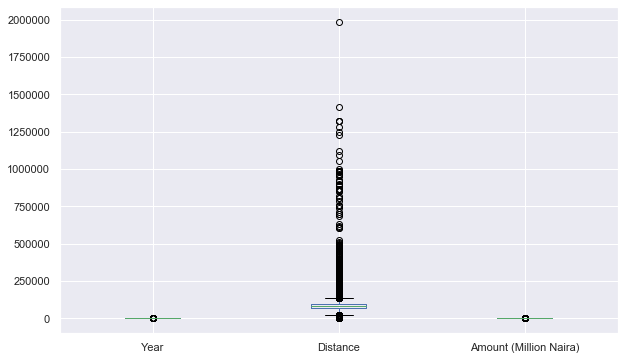

In [54]:
Train.boxplot(figsize=(10,6))

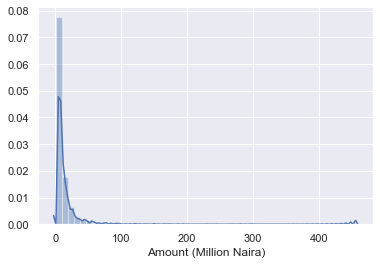

In [55]:
sns.distplot(Train['Amount (Million Naira)'])

In [56]:
# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = Train['Amount (Million Naira)'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = Train[Train['Amount (Million Naira)'] < q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Location,Maker,Year,Type,Distance,Amount (Million Naira)
count,7130,7130,7130.000000,7130,7.130000e+03,7130.000000
unique,3,9,NaN,3,NaN,NaN
top,Lagos,Toyota,NaN,Foreign Used,NaN,NaN
freq,3309,2734,NaN,5072,NaN,NaN
mean,NaN,NaN,2010.928191,NaN,9.636353e+04,9.832885
std,NaN,NaN,4.780719,NaN,9.778483e+04,12.012210
min,NaN,NaN,1979.000000,NaN,1.000000e+00,0.450000
25%,NaN,NaN,2008.000000,NaN,6.800000e+04,3.500000
50%,NaN,NaN,2011.000000,NaN,8.083000e+04,5.625000
75%,NaN,NaN,2014.000000,NaN,9.600000e+04,11.250000


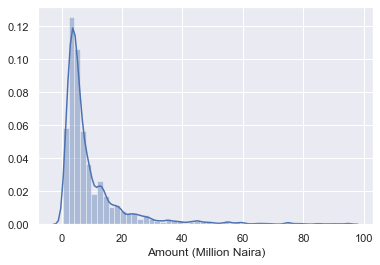

In [57]:
sns.distplot(data_1['Amount (Million Naira)'])

In [58]:
Price = data_1['Amount (Million Naira)']
# Get statistics
min_val = Price.min()
max_val = Price.max()
mean_val =Price.mean()
med_val = Price.median()
mod_val = Price.mode()[0]




C:\Users\Mnesoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


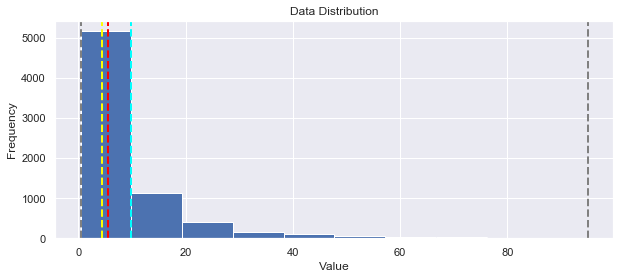

In [59]:
# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(Price)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

C:\Users\Mnesoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


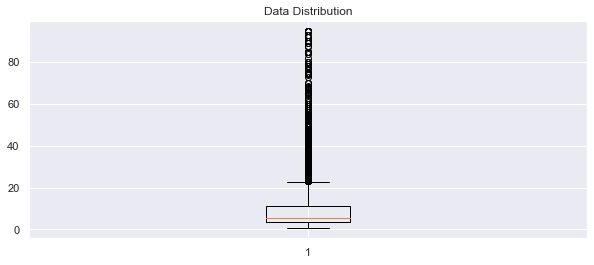

In [60]:
# Get the variable to examine
Price = data_1['Amount (Million Naira)']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(Price )

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

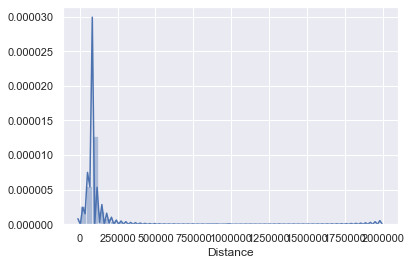

In [61]:
sns.distplot(data_1['Distance'])

In [62]:
q = data_1['Distance'].quantile(0.99)
data_2 = data_1[data_1['Distance'] < q]

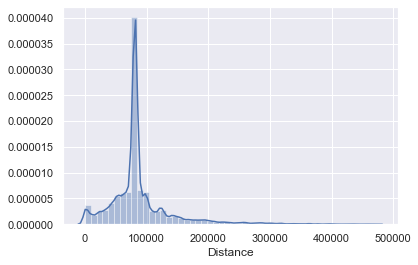

In [63]:
sns.distplot(data_2['Distance'])

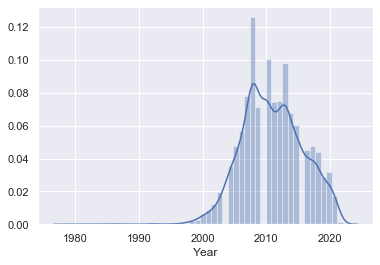

In [64]:
sns.distplot(data_2['Year'])

In [65]:
# I'll simply remove them
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

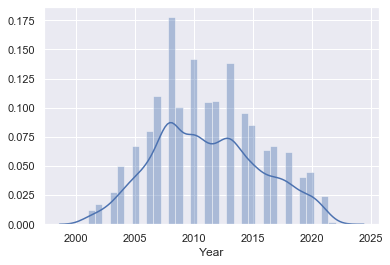

In [66]:
sns.distplot(data_3['Year'])

In [67]:
data_cleaned = data_3.reset_index(drop=True)

In [68]:
data_cleaned.describe(include='all')

,Location,Maker,Year,Type,Distance,Amount (Million Naira)
count,6975,6975,6975.000000,6975,6975.000000,6975.000000
unique,3,9,NaN,3,NaN,NaN
top,Lagos,Toyota,NaN,Foreign Used,NaN,NaN
freq,3230,2671,NaN,5000,NaN,NaN
mean,NaN,NaN,2011.115986,NaN,87780.305520,9.984277
std,NaN,NaN,4.574890,NaN,52584.967558,12.095386
min,NaN,NaN,2001.000000,NaN,1.000000,0.600000
25%,NaN,NaN,2008.000000,NaN,66000.000000,3.590000
50%,NaN,NaN,2011.000000,NaN,80830.000000,5.700000
75%,NaN,NaN,2014.000000,NaN,93026.000000,11.500000


In [69]:
data_cleaned.head()

,Location,Maker,Year,Type,Distance,Amount (Million Naira)
0,Abuja,Honda,2011,Nigerian Used,80830.0,2.2
1,Ibadan,Hyundai,2012,Nigerian Used,125000.0,3.5
2,Lagos,Lexus,2010,Foreign Used,110852.0,9.2
3,Abuja,Mercedes-Benz,2017,Foreign Used,30000.0,22.8
4,Ibadan,Toyota,2002,Nigerian Used,125206.0,2.6


C:\Users\Mnesoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


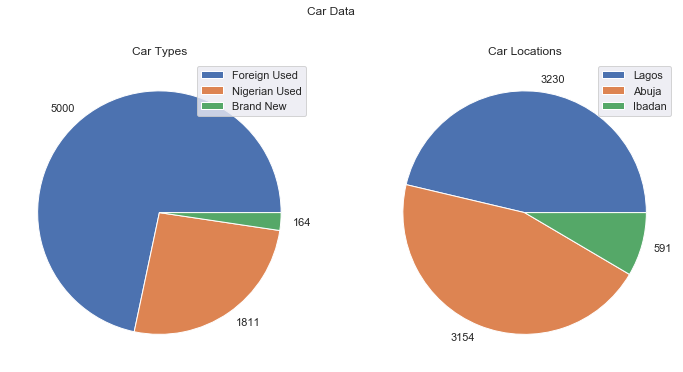

In [70]:
 #Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (12,6))

# Create a bar plot of name vs grade on the first axis
Type_counts = data_cleaned['Type'].value_counts()
ax[0].pie(Type_counts, labels=Type_counts)
ax[0].set_title('Car Types')
ax[0].legend(Type_counts.keys().tolist())

# Create a pie chart of pass counts on the second axis
Location_counts = data_cleaned['Location'].value_counts()
ax[1].pie(Location_counts, labels=Location_counts)
ax[1].set_title('Car Locations')
ax[1].legend(Location_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Car Data')

# Show the figure
fig.show()
    

Text(0.5, 1.0, 'Price and Distance')

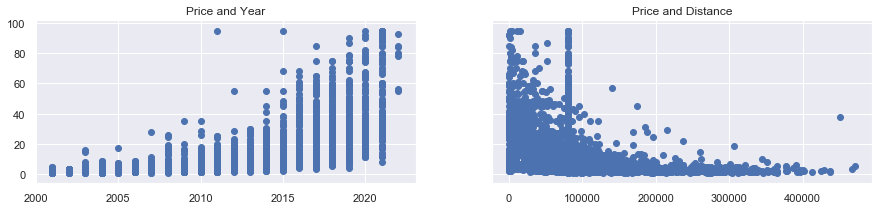

In [71]:
#since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)

f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (15,3)) # sharey is 'Share' Price as Y 
ax1.scatter(data_cleaned['Year'], data_cleaned['Amount (Million Naira)'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Distance'], data_cleaned['Amount (Million Naira)'])
ax2.set_title('Price and Distance')


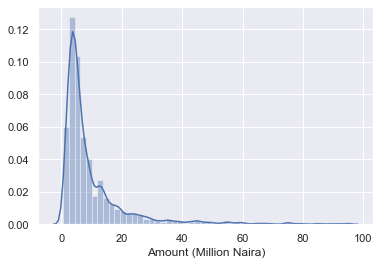

In [72]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(data_cleaned['Amount (Million Naira)'])

In [73]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Amount (Million Naira)'])

# Then we add it to our data frame
data_cleaned['Log Price'] = log_price
data_cleaned

,Location,Maker,Year,Type,Distance,Amount (Million Naira),Log Price
0,Abuja,Honda,2011,Nigerian Used,80830.0,2.20,0.788457
1,Ibadan,Hyundai,2012,Nigerian Used,125000.0,3.50,1.252763
2,Lagos,Lexus,2010,Foreign Used,110852.0,9.20,2.219203
3,Abuja,Mercedes-Benz,2017,Foreign Used,30000.0,22.80,3.126761
4,Ibadan,Toyota,2002,Nigerian Used,125206.0,2.60,0.955511
5,Lagos,Toyota,2011,Foreign Used,80830.0,7.50,2.014903
6,Lagos,Lexus,2019,Foreign Used,80830.0,79.00,4.369448
7,Abuja,Toyota,2015,Foreign Used,80830.0,9.00,2.197225
8,Lagos,Toyota,2012,Foreign Used,350882.0,7.76,2.048982
9,Ibadan,Mercedes-Benz,2004,Foreign Used,179638.0,2.50,0.916291


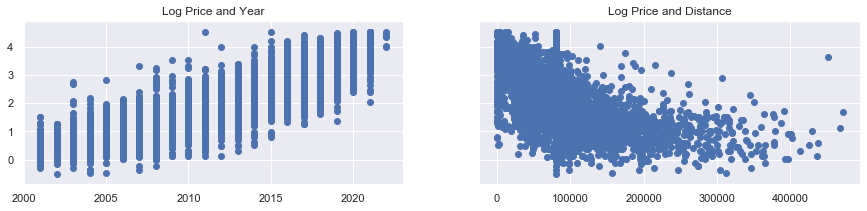

In [74]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (15,3)) # sharey is 'Share' Price as Y 
ax1.scatter(data_cleaned['Year'], data_cleaned['Log Price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['Distance'], data_cleaned['Log Price'])
ax2.set_title('Log Price and Distance')

plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [75]:
# Lets drop original Price column since its no longer needed 

data_cleaned = data_cleaned.drop(['Amount (Million Naira)'], axis = 1)

In [76]:
# sklearn does not have a built-in way to check for multicollinearity

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Distance','Year']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [77]:
# Let's explore the result
vif

,VIF,Features
0,3.774149,Distance
1,3.774149,Year


In [78]:
data_cleaned.head()

,Location,Maker,Year,Type,Distance,Log Price
0,Abuja,Honda,2011,Nigerian Used,80830.0,0.788457
1,Ibadan,Hyundai,2012,Nigerian Used,125000.0,1.252763
2,Lagos,Lexus,2010,Foreign Used,110852.0,2.219203
3,Abuja,Mercedes-Benz,2017,Foreign Used,30000.0,3.126761
4,Ibadan,Toyota,2002,Nigerian Used,125206.0,0.955511


In [79]:
data_cleaned.duplicated().sum()

294

In [80]:
data_cleaned.drop_duplicates(inplace = True)

In [81]:
data_cleaned.duplicated().sum()

0

In [82]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity

data_with_dum = pd.get_dummies(data_cleaned, drop_first = False)
data_with_dummies = pd.get_dummies(data_cleaned, drop_first = True)

In [83]:
data_with_dummies.head()

,Year,Distance,Log Price,Location_Ibadan,Location_Lagos,Maker_Ford,Maker_Honda,Maker_Hyundai,Maker_Land Rover,Maker_Lexus,Maker_Mercedes-Benz,Maker_Other Makers,Maker_Toyota,Type_Foreign Used,Type_Nigerian Used
0,2011,80830.0,0.788457,0,0,0,1,0,0,0,0,0,0,0,1
1,2012,125000.0,1.252763,1,0,0,0,1,0,0,0,0,0,0,1
2,2010,110852.0,2.219203,0,1,0,0,0,0,1,0,0,0,1,0
3,2017,30000.0,3.126761,0,0,0,0,0,0,0,1,0,0,1,0
4,2002,125206.0,0.955511,1,0,0,0,0,0,0,0,0,1,0,1


In [84]:
data_with_dummies.columns.values

array(['Year', 'Distance', 'Log Price', 'Location_Ibadan',
       'Location_Lagos', 'Maker_Ford', 'Maker_Honda', 'Maker_Hyundai',
       'Maker_Land Rover', 'Maker_Lexus', 'Maker_Mercedes-Benz',
       'Maker_Other Makers', 'Maker_Toyota', 'Type_Foreign Used',
       'Type_Nigerian Used'], dtype=object)

In [85]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['Year', 'Distance', 'Log Price', 'Location_Ibadan',
       'Location_Lagos', 'Maker_Ford', 'Maker_Honda', 'Maker_Hyundai',
       'Maker_Land Rover', 'Maker_Lexus', 'Maker_Mercedes-Benz',
       'Maker_Other Makers', 'Maker_Toyota', 'Type_Foreign Used',
       'Type_Nigerian Used']

In [86]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Year,Distance,Log Price,Location_Ibadan,Location_Lagos,Maker_Ford,Maker_Honda,Maker_Hyundai,Maker_Land Rover,Maker_Lexus,Maker_Mercedes-Benz,Maker_Other Makers,Maker_Toyota,Type_Foreign Used,Type_Nigerian Used
0,2011,80830.0,0.788457,0,0,0,1,0,0,0,0,0,0,0,1
1,2012,125000.0,1.252763,1,0,0,0,1,0,0,0,0,0,0,1
2,2010,110852.0,2.219203,0,1,0,0,0,0,1,0,0,0,1,0
3,2017,30000.0,3.126761,0,0,0,0,0,0,0,1,0,0,1,0
4,2002,125206.0,0.955511,1,0,0,0,0,0,0,0,0,1,0,1


In [87]:
# Lets check for multicolliniearity after converting dummies to numerical 


variables = data_preprocessed.drop(['Log Price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,89.241590,Year
1,4.455352,Distance
2,1.275692,Location_Ibadan
3,2.375640,Location_Lagos
4,1.850531,Maker_Ford
5,3.447973,Maker_Honda
6,2.103454,Maker_Hyundai
7,1.850172,Maker_Land Rover
8,11.102377,Maker_Lexus
9,8.824958,Maker_Mercedes-Benz


In [88]:
target = data_preprocessed['Log Price']
inputs = data_preprocessed.drop(['Log Price'], axis = 1)

In [89]:
 data_preprocessed.head()

,Year,Distance,Log Price,Location_Ibadan,Location_Lagos,Maker_Ford,Maker_Honda,Maker_Hyundai,Maker_Land Rover,Maker_Lexus,Maker_Mercedes-Benz,Maker_Other Makers,Maker_Toyota,Type_Foreign Used,Type_Nigerian Used
0,2011,80830.0,0.788457,0,0,0,1,0,0,0,0,0,0,0,1
1,2012,125000.0,1.252763,1,0,0,0,1,0,0,0,0,0,0,1
2,2010,110852.0,2.219203,0,1,0,0,0,0,1,0,0,0,1,0
3,2017,30000.0,3.126761,0,0,0,0,0,0,0,1,0,0,1,0
4,2002,125206.0,0.955511,1,0,0,0,0,0,0,0,0,1,0,1


In [90]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

C:\Users\Mnesoma\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [91]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

C:\Users\Mnesoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  


In [92]:
from sklearn.model_selection import train_test_split 

In [93]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size = 0.2, random_state =365)

In [94]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(5344, 14) (1337, 14)
(5344,) (1337,)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 0.12570220088799336
RMSE: 0.35454506185814144
R2: 0.8397598108747395


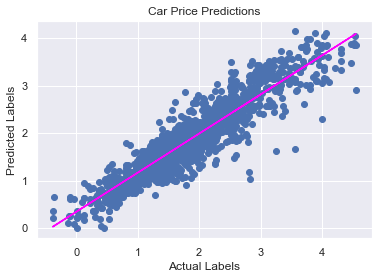

In [95]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(x_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Car Price Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 0.12378783607670642
RMSE: 0.35183495573451257
R2: 0.8422001673462121


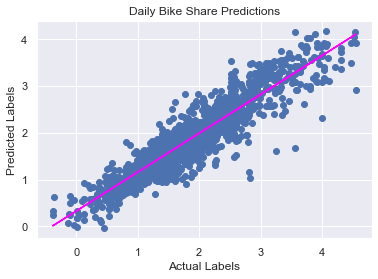

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(x_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [98]:
import pickle

In [101]:
#save the model
import pickle
with open('model.pkl', 'wb') as fh:
   pickle.dump(alg, fh)

In [ ]:
cat = data.drop(['price'] , axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)